# 01: Frequency Distributions and Graphs

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
import math 


%matplotlib inline

A frequency distribution helps us to detect any pattern in the data, assuming that a pattern exists. 



### Working Example 

Given a list of movie ratings, let's build a frequency distribution

In [2]:
ratings = [3, 7, 2, 7, 8, 3, 1, 4, 10, 3, 2, 5, 3, 5, 8, 9, 7, 6, 3, 7, 8, 9, 7, 3, 6]

In [3]:
# Transform the list into a Pandas Series for easier manipulation 
obs = pd.Series(ratings)

In [4]:
# Build a frequency distribution
freq = obs.value_counts().sort_index(ascending=False).to_frame('f').rename_axis('rating')

In [5]:
freq               

,f
rating,
10,1
9,2
8,3
7,5
6,2
5,2
4,1
3,6
2,2


## Rules for Creating Frequency Distributions 

1. Each observation should be included in one, and only one, class. 
2. List all classes, even those with zero frequencies. 
3. All classes should have equal intervals 
4. All classes should have both an upper boundary and a lower boundary 
5. Select the class interval from convenient numbers, such as 1,2,3, ... 10, particularly 5 and 10 or multiples of 5 and 10. 
6. The lower boundary of each class interval should be a multiple of the class interval. 
7. Aim for a total of approximately 10 classes

#### Example Dataset: IQ scores of students in a class

We will be using the following dataset to explain the process of creating a frequency distribution. 

In [6]:
iq_scores = [91, 85, 84, 79, 80,
87, 96, 75, 86, 104,
95, 71, 105, 90, 77,
123, 80, 100, 93, 108,
98, 69, 99, 95, 90,
110, 109, 94, 100, 103,
112, 90, 90, 98, 89]

In [7]:
iq = pd.Series(iq_scores)

In [8]:
iq.head()

0    91
1    85
2    84
3    79
4    80
dtype: int64

### 3 Stage Process of Creating a Frequency Distribution 

#### Stage 1: Creating the bins 

In [9]:
### 1.0.1 Identify the lowest value
lowest = iq.min()

lowest

69

In [10]:
### 1.0.2 Identify the highest value
highest = iq.max()

highest

123

In [11]:
### 1.1 Identify the range 
range = highest - lowest

range

54

In [12]:
### 1.2.1 Select desired number of classes 
num_bins = 10 

### 1.2 Find the class interval required to span the range
interval = range / num_bins

interval

5.4

In [13]:
### 1.3 Round off to the nearest convenient interval 
interval = round(interval)

interval

5

In [14]:
### 1.4 Determine where the lowest class should begin

# Lower bound (rounded down to nearest convenient interval)

lower_bound = math.floor(lowest/interval)*interval

lower_bound

65

In [15]:
### 1.5 Determine where the highest class should begin
upper_bound = math.ceil(highest/interval)*interval

upper_bound

125

In [16]:
### 1.6 Create the bins 
bins = pd.interval_range(start=lower_bound, end=upper_bound, freq=interval, closed='left')

bins

IntervalIndex([[65, 70), [70, 75), [75, 80), [80, 85), [85, 90) ... [100, 105), [105, 110), [110, 115), [115, 120), [120, 125)], dtype='interval[int64, left]')

#### Stage 2 Map values to bins


In [17]:
mapped = pd.cut(iq, bins=bins)

mapped.head()

0    [90, 95)
1    [85, 90)
2    [80, 85)
3    [75, 80)
4    [80, 85)
dtype: category
Categories (12, interval[int64, left]): [[65, 70) < [70, 75) < [75, 80) < [80, 85) ... [105, 110) < [110, 115) < [115, 120) < [120, 125)]

#### Stage 3: Count the frequency of each bin 

In [18]:
## Mimic the SQL style with Group By
# f = mapped.groupby(by=mapped, sort=False).count()

# Using Value Counts 
f = mapped.value_counts(sort=False)

f

[65, 70)      1
[70, 75)      1
[75, 80)      3
[80, 85)      3
[85, 90)      4
[90, 95)      7
[95, 100)     6
[100, 105)    4
[105, 110)    3
[110, 115)    2
[115, 120)    0
[120, 125)    1
dtype: int64

#### (Optional) Stage 4: Supply headings and title 

In [19]:
f = f.to_frame('f').rename_axis('IQ Score')

In [20]:
f

,f
IQ Score,
"[65, 70)",1
"[70, 75)",1
"[75, 80)",3
"[80, 85)",3
"[85, 90)",4
"[90, 95)",7
"[95, 100)",6
"[100, 105)",4
"[105, 110)",3


### Handling Outliers 

- An outlier is a very extreme score 
- There is a chance that an outlier is a regular score that was erroneously recorded (eg. GPA: 0.6 instead of 3.6)
- Check to see if the score is legitimate or an error 
- Might exclude them from summaries 
- They might enhance understanding of the data 

## Relative Frequency Distributions 

Relative frequency distributions show the frequency of each class as a part or fraction of the total frequency for the entire distribution. 

- To convert a frequency distribution into a relative frequency distribution, divide the frequency for each class by the total frequency for the entire distribution. 

In [21]:
rel_f = round(f / f.sum(),2)*100

rel_f

,f
IQ Score,
"[65, 70)",3.0
"[70, 75)",3.0
"[75, 80)",9.0
"[80, 85)",9.0
"[85, 90)",11.0
"[90, 95)",20.0
"[95, 100)",17.0
"[100, 105)",11.0
"[105, 110)",9.0


## Cumulative Frequency Distributions

Cumulative frequency distributions show the total number of observations in each class and in all lower-ranked classes. 

- Useful when relative standing within distribution is important (example: academic test scores)
- Cumulative frequencies are often converted into cumulative percentages, commonly known as percentile ranks. 
- The **percentile rank** of a score indicates the percentage of scores in the entire distribution with similar or smaller values than that score

- To convert a frequency distribution into a cumulative frequency distribution, add to the frequency of each class the sum of the frequencies of all classes ranked below it. 

#### Example: Frequency distribution of GRE scores

In [22]:
gre_freq = pd.Series({'725–749': 1,
'700–724': 3,
'675–699': 14,
'650–674': 30,
'625–649': 34,
'600–624': 42,
'575–599': 30,
'550–574': 27,
'525–549': 13,
'500–524': 4,
'475–499': 2}, name='GRE')

gre_freq

725–749     1
700–724     3
675–699    14
650–674    30
625–649    34
600–624    42
575–599    30
550–574    27
525–549    13
500–524     4
475–499     2
Name: GRE, dtype: int64

In [23]:
# Calculate the relative frequency
gre_rel_freq = round(gre_freq / gre_freq.sum(),3)

gre_rel_freq

725–749    0.005
700–724    0.015
675–699    0.070
650–674    0.150
625–649    0.170
600–624    0.210
575–599    0.150
550–574    0.135
525–549    0.065
500–524    0.020
475–499    0.010
Name: GRE, dtype: float64

In [24]:
 # Calculate cumulative frequencies. Sorting of classes is important as cumsum cumulates from top to bottom 
 gre_cum_freq = gre_freq.sort_index().cumsum()

 gre_cum_freq

475–499      2
500–524      6
525–549     19
550–574     46
575–599     76
600–624    118
625–649    152
650–674    182
675–699    196
700–724    199
725–749    200
Name: GRE, dtype: int64

In [25]:
# Create a cumulative percent column
gre_percentiles = (gre_cum_freq / gre_cum_freq.max()) * 100

gre_percentiles

475–499      1.0
500–524      3.0
525–549      9.5
550–574     23.0
575–599     38.0
600–624     59.0
625–649     76.0
650–674     91.0
675–699     98.0
700–724     99.5
725–749    100.0
Name: GRE, dtype: float64

In [26]:
# Create a dataframe for storing different frequencies
gre_dist = gre_freq.to_frame('f').rename_axis('GRE')

# Add relative frequency to the dataframe
gre_dist['Relative f'] = gre_rel_freq

# Add cumulative frequency to the dataframe
gre_dist['Cumulative f'] = gre_cum_freq

gre_dist['Percentile Rank'] = gre_percentiles

In [27]:
gre_dist

,f,Relative f,Cumulative f,Percentile Rank
GRE,,,,
725–749,1,0.005,200,100.0
700–724,3,0.015,199,99.5
675–699,14,0.070,196,98.0
650–674,30,0.150,182,91.0
625–649,34,0.170,152,76.0
600–624,42,0.210,118,59.0
575–599,30,0.150,76,38.0
550–574,27,0.135,46,23.0
525–549,13,0.065,19,9.5


#### Example: Distribution of Parental Ratings of Movies 

In [28]:
ratings = ['PG', 'PG', 'PG', 'PG-13', 'G',
'G', 'PG-13', 'R', 'PG', 'PG',
'R', 'PG', 'R', 'PG', 'R',
'NC-17', 'NC-17', 'PG','G', 'PG-13']

categories = ['NC-17', 'R', 'PG-13', 'PG', 'G']

ratings = pd.Categorical(values=ratings, categories=categories, ordered=True)

ratings = pd.Series(ratings, dtype='category')

ratings.head()

0       PG
1       PG
2       PG
3    PG-13
4        G
dtype: category
Categories (5, object): ['NC-17' < 'R' < 'PG-13' < 'PG' < 'G']

In [29]:
ratings_dist = ratings.value_counts(sort=False).to_frame('f').rename_axis('Rating')

ratings_dist

,f
Rating,
NC-17,2
R,4
PG-13,3
PG,8
G,3


In [30]:
ratings_dist['Rel f'] = round(ratings_dist['f']/ratings_dist['f'].sum() * 100 ,3)

In [31]:
ratings_dist

,f,Rel f
Rating,,
NC-17,2,10.0
R,4,20.0
PG-13,3,15.0
PG,8,40.0
G,3,15.0


In [32]:
ratings_dist['Cum f'] = ratings_dist['f'].sort_index(ascending=False).cumsum()

In [33]:
ratings_dist

,f,Rel f,Cum f
Rating,,,
NC-17,2,10.0,20
R,4,20.0,18
PG-13,3,15.0,14
PG,8,40.0,11
G,3,15.0,3


In [34]:
ratings_dist['Percentile'] = round(ratings_dist['Cum f']/ratings_dist['Cum f'].max() * 100, 3)

In [35]:
ratings_dist

,f,Rel f,Cum f,Percentile
Rating,,,,
NC-17,2,10.0,20,100.0
R,4,20.0,18,90.0
PG-13,3,15.0,14,70.0
PG,8,40.0,11,55.0
G,3,15.0,3,15.0


## Graphs 
- A **Histogram** is a bar-type graph for quantitative data. The common boundaries between adjacent bars emphasize the continuity of the data, as with continuous variables 
- A **Frequency Polygon** is a line graph for quantitative data that also emphasizes the continuity of continuous variables. 
- A **Stem and Lead Display** is a device for sorting quantitative data on the basis of leading and trailing digits. 
- A **Bar Graph** is a bar-type graph for qualitative data. Gaps between adjacent bars emphasize the discontinuous nature of the data. 
- A **Positively Skewed Distribution** is a distribution that includes a few extreme observations in the positive direction (to the right of the majority of observations).
- A **Negatively Skewed Distribution** is a distribution that includes a few extreme observations in the negative direction (to the left of the majority of observations).

### Rules for Constructing Graphs 
1. Decide on the appropriate type of graph
2. Identify the class intervals that will be superimposed on the horizontal axis (i.e. x axis major ticks)
3. Along the entire vertical axis, superimpose a progression of convenient numbers (i.e. y axis major ticks)
4. Supply labels for both axes and a title (or even an explanatory sentence) for the graph

#### Example: Distribution of Income of College Graduates

In [36]:
incomes = pd.Series({
    '130,000–139,999': 1,
    '120,000–129,999': 0,
    '110,000–119,999': 1,
    '100,000–109,999': 3,
    '90,000–99,999': 1,
    '80,000–89,999': 5,
    '70,000–79,999': 7,
    '60,000–69,999': 10,
    '50,000–59,999': 14,
    '40,000–49,999': 23,
    '30,000–39,999': 17,
    '20,000–29,999': 10,
    '10,000–19,999': 8,
    '0–9,999': 3
})

incomes.head()

130,000–139,999    1
120,000–129,999    0
110,000–119,999    1
100,000–109,999    3
90,000–99,999      1
dtype: int64

In [46]:
incomes.index

Index(['130,000–139,999', '120,000–129,999', '110,000–119,999',
       '100,000–109,999', '90,000–99,999', '80,000–89,999', '70,000–79,999',
       '60,000–69,999', '50,000–59,999', '40,000–49,999', '30,000–39,999',
       '20,000–29,999', '10,000–19,999', '0–9,999'],
      dtype='object')

In [249]:
incomes_df = incomes.to_frame('f').rename_axis('income').reset_index()

In [252]:
incomes_df.sort_index(ascending=False, inplace=True)

In [253]:
incomes_df

,income,f
13,"0–9,999",3
12,"10,000–19,999",8
11,"20,000–29,999",10
10,"30,000–39,999",17
9,"40,000–49,999",23
8,"50,000–59,999",14
7,"60,000–69,999",10
6,"70,000–79,999",7
5,"80,000–89,999",5
4,"90,000–99,999",1


AxesSubplot(0.0704716,0.107546;0.881351x0.862454)


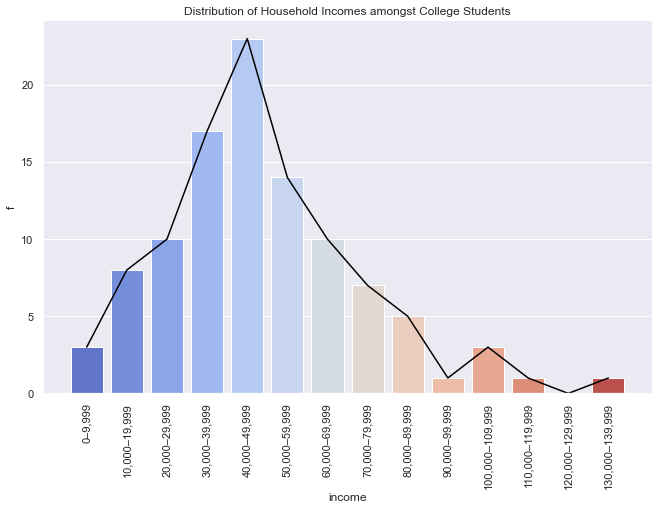

In [277]:
# Construct a histogram


# Usuing SNS (Axes Level) + MPL in conjunction 
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
# sns.barplot(x='income', y='f', data=incomes_df, palette='coolwarm')


sns.set_theme()
# Using SNS object oriented 
g = sns.catplot(x='income', y='f', data=incomes_df, palette='coolwarm', kind='bar', height=6, aspect=16/10).set(title='Distribution of Household Incomes amongst College Students')

ax = g.fig.axes[0]
labels = ax.get_xticklabels()
ax.set_xticklabels(labels,rotation = 90)

sns.lineplot(x="income", y="f", data=incomes_df, color='black', ax=ax)


print(ax)

# Using Pandas 
#incomes.plot(kind='bar', width=1, edgecolor='white')


/var/folders/yj/d79vt9ns0kg81603khc7507h0000gn/T/ipykernel_83254/2887394156.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels,rotation = 90)


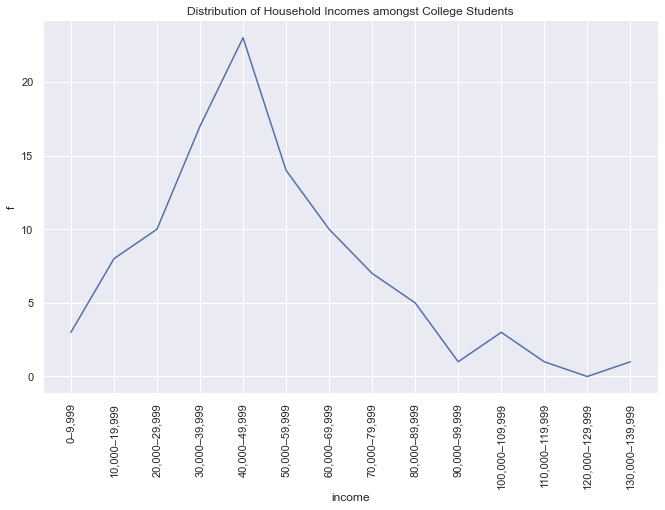

In [278]:
g = sns.relplot(x="income", y="f", data=incomes_df, palette='magma', kind='line', height=6, aspect=16/10).set(title='Distribution of Household Incomes amongst College Students')

ax = g.fig.axes[0]
labels = ax.get_xticklabels()
ax.set_xticklabels(labels,rotation = 90)

plt.show()

### Example: Two Age Distributions

In [352]:
categories = pd.Categorical(['65–above','60–64','55–59','50–54','45–49','40–44','35–39','30–34','25–29','20–24','15–19' ,'10–14','5–9','0–4'], categories= reversed(['65–above','60–64','55–59','50–54','45–49','40–44','35–39','30–34','25–29','20–24','15–19' ,'10–14','5–9','0–4']), ordered=True)

categories

['65–above', '60–64', '55–59', '50–54', '45–49', ..., '20–24', '15–19', '10–14', '5–9', '0–4']
Length: 14
Categories (14, object): ['0–4' < '5–9' < '10–14' < '15–19' ... '50–54' < '55–59' < '60–64' < '65–above']

In [353]:
age_dist = pd.DataFrame(data=[[105, 13], [53, 5], [45, 6], [40, 7], [44, 7], [38, 7], [31, 7], [27, 6], [25, 7], [20, 7], [20, 7], [19, 7], [17, 7], [16, 7]], index=categories, columns=['Small Town f', 'U.S. Population (2010) %']).rename_axis('Age')

In [354]:
age_dist

,Small Town f,U.S. Population (2010) %
Age,,
65–above,105,13
60–64,53,5
55–59,45,6
50–54,40,7
45–49,44,7
40–44,38,7
35–39,31,7
30–34,27,6
25–29,25,7


In [355]:
age_dist['Small Town %'] = age_dist['Small Town f']/age_dist['Small Town f'].sum() * 100

In [356]:
age_dist

,Small Town f,U.S. Population (2010) %,Small Town %
Age,,,
65–above,105,13,21.0
60–64,53,5,10.6
55–59,45,6,9.0
50–54,40,7,8.0
45–49,44,7,8.8
40–44,38,7,7.6
35–39,31,7,6.2
30–34,27,6,5.4
25–29,25,7,5.0


In [362]:
age_dist_long = pd.melt(age_dist.reset_index(), id_vars='Age', value_vars=['U.S. Population (2010) %', 'Small Town %'], value_name='Relative f (%)', var_name='Data')

/var/folders/yj/d79vt9ns0kg81603khc7507h0000gn/T/ipykernel_83254/3640925549.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


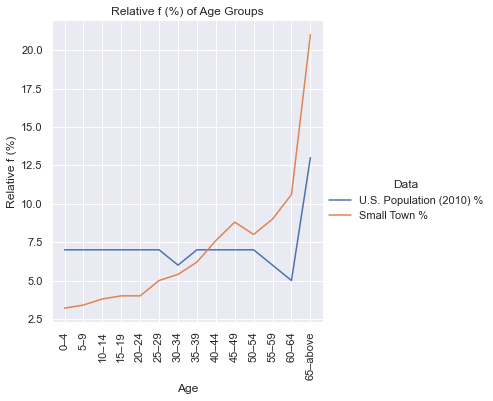

In [363]:
g = sns.relplot(x='Age', y='Relative f (%)', hue='Data', data=age_dist_long, kind='line').set(title='Relative f (%) of Age Groups')

ax = g.fig.axes[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()